

#### CS 260 Final Project - Fall 2021
---

# Title: Tour de France Statistical Analysis 

### By: Geneway Tang


---

## 1. Introduction:

For this project, I explored various statistical trends for past 100 years in the Tour de France. The Tour De France is an annual multi-stage endurance cycling race that is held over a course of multiple days and different stages in France. Each year, teams of 8 riders compete in this race, hoping to have their lead rider complete all the stages of the tour in the shortest cumulative amount of time, winning the race. Teams from all over the world, either national or private, attend this high profile race in hope of attaining the coveted yellow jersey which is awarded to the overall winner of the race. 

I plan to ask these questions.  

1. Overarching Question: What are the defining characteristics of the Tour de France and how has the race evolved in the past 100 years?
2. What is the trend of the ages of the winners in the Tour in the past 100 years?
3. How does France compare to other countries in stage wins?
4. Is there a certain team that stands out with the most overall wins in the history of the Tour de France?
5. How do the overall wins compare to the stage wins for different teams?
6. What is the relationship between tour length and the percentage of dropped out riders?



---

## 2. Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
url = "https://raw.githubusercontent.com/genewaytang/CS260_Project/main/Tour_de_France_data.csv"
tour_df = pd.read_csv(url)
tour_df

,Year,Winner,Country,Age,Team,Time (hh:mm:ss),Time (hrs),Distance (km),Distance (miles),Avg. Speed (km/h),Avg. Speed (mph),Margin (hh:mm:ss),Margin (min),Stage Wins,Stages in Lead,Stages,Starting Riders,Finishing Riders
0,1903,Maurice Garin,France,32,La Francaise,94:33:00,94.550,2428,1509,25.679,15.956,2:59:21,179.3500,3,6,6,60,21
1,1904,Henri Cornet,France,20,Conte,96:05:56,96.099,2428,1509,25.265,15.699,2:16:14,136.2333,1,3,6,88,27
2,1905,Louis Trousselier,France,24,Peugeot-Wolber,110:26:58,110.449,2994,1860,27.107,16.844,NaN,NaN,5,10,11,60,24
3,1906,Rene Pottier,France,27,Peugeot-Wolber,189:34:00,189.567,4637,2881,24.463,15.201,NaN,NaN,5,12,13,82,14
4,1907,Lucien Petit-Breton,France,24,Peugeot-Wolber,158:45:05,158.751,4488,2789,28.470,17.690,NaN,NaN,2,5,14,93,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2014,Vincenzo Nibali,Italy,29,Astana,89:59:06,89.985,3659,2274,40.662,25.266,0:07:37,7.6167,4,19,21,198,164
101,2015,Chris Froome,Great Britain,30,Team Sky,84:46:14,84.771,3354,2084,39.567,24.586,0:01:12,1.2000,1,16,21,198,160
102,2016,Chris Froome,Great Britain,31,Team Sky,89:04:48,89.080,3529,2193,39.571,24.588,0:04:05,4.0833,2,14,21,198,174
103,2017,Chris Froome,Great Britain,32,Team Sky,86:20:55,86.349,3540,2200,40.995,25.473,0:00:54,0.9000,0,15,21,198,167


### 2.1 Variables Explained

Below is a list of each variable in the dataset and its explanation.

* **Year:** the year of tour
* **Winner:** the name of all the winner for that year
* **Country:** the country the winner is from
* **Age:** the age of the winner
* **Team:** the name of the cycling Team
* **Time (hh,mm,ss):** total cumulative ride time
* **Time (in hours):** total cumulative ride time in hours
* **Distance (kilometers):** total cumulative ride distance (in kilometers)
* **Distance (miles):** total cumulative ride distance (in miles)
* **Avg Speed (km/h):** average speed for duration of tour (km/h)
* **Avg Speed (m/h):** average speed for duration of tour (m/h)
* **Margin (hh,mm,ss):** winning margin time
* **Margin (in minutes):** winning margin time (in minutes)
* **Stage Wins:** number of stage wins
* **Stages in Lead:** number of stages rider was in the overall lead
* **Stages:** total of stages in tour
* **Starting riders:** total number of starting riders
* **Finishing riders:** total number of finishing riders

---

## 3. Results

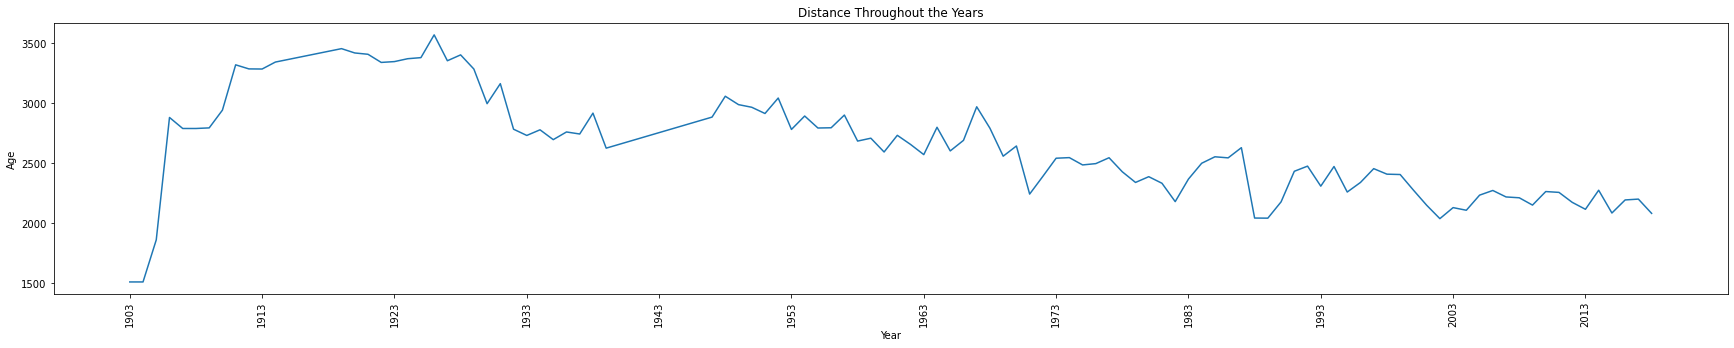

In [5]:
plt.rcParams["figure.figsize"] = (30,5)
plt.xticks(np.arange(1903,2019,10),rotation = 90)
plt.plot(tour_df['Year'],tour_df['Distance (miles)'])
plt.title('Distance Throughout the Years')
plt.ylabel('Age')
plt.xlabel('Year');

From this plot above, I saw see that in the first few years of the Tour de France, the total distance of the race was much shorter than the rest of the years. By ignoring the first few years of the tour with the outliers in distance, it was easier to see a trend without the extreme outliers. I also noticed how after the first couple of years of the tour, the total length of the race had a slightly downwards trend, showing that in the last 100 years, the length of the race has shortened, maybe to reduce the lack of finishing riders, which is later shown on in the analysis.

In [46]:
tour_df_modified = tour_df.iloc[3:].copy()

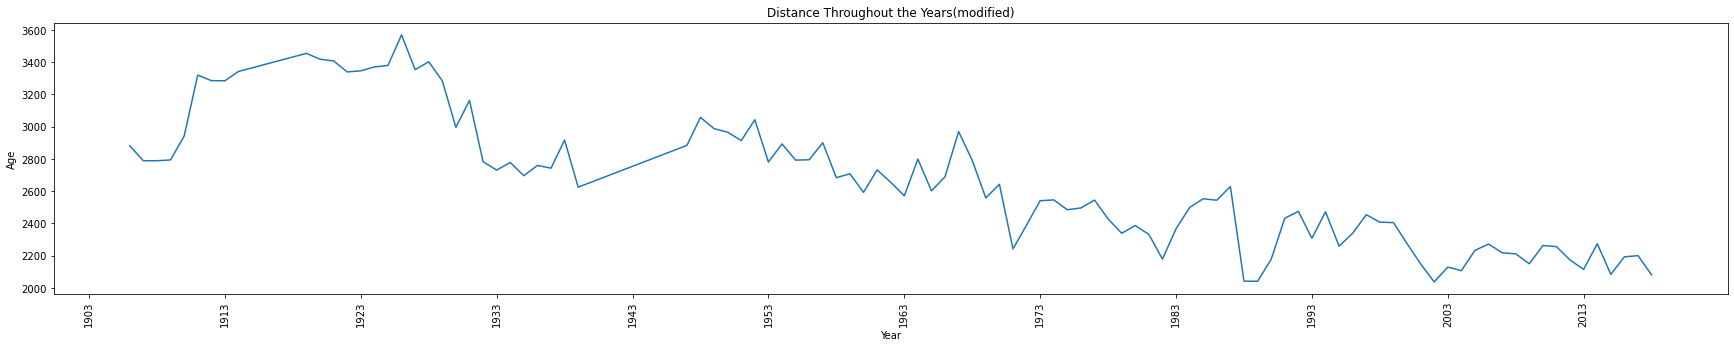

In [45]:
plt.rcParams["figure.figsize"] = (30,5)
plt.xticks(np.arange(1903,2019,10),rotation = 90)
plt.plot(tour_df_modified['Year'],tour_df_modified['Distance (miles)'])
plt.title('Distance Throughout the Years(modified)')
plt.ylabel('Age')
plt.xlabel('Year');

Above is the modified visual with the first three years of the Tour de France omitted. It can be seen that there is a downwards trend starting from 1903 to 2019 in the total distance.

**What is the trend of the ages of the winners in the Tour in the past 100 years?**

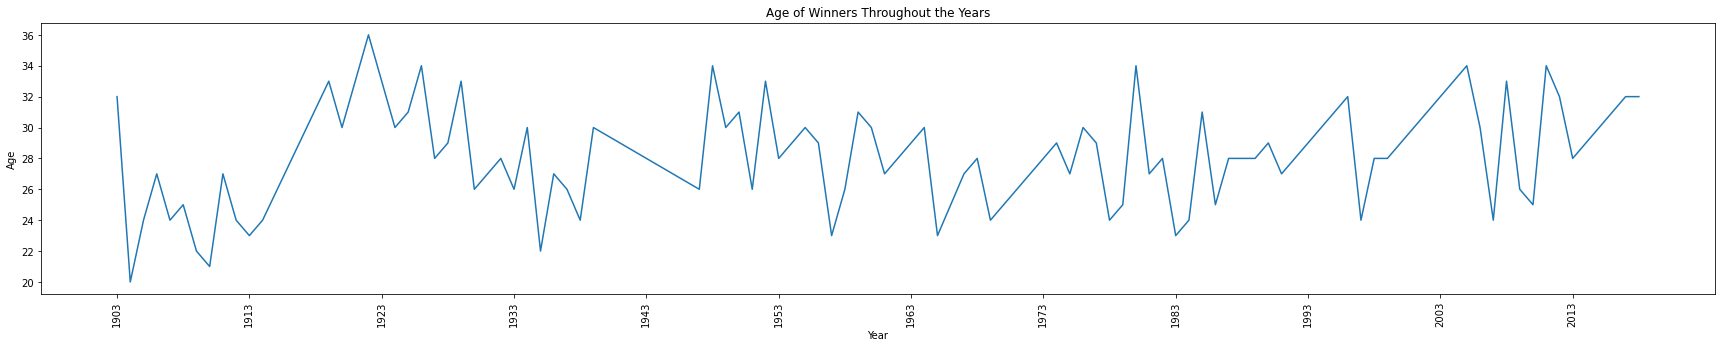

In [3]:
plt.rcParams["figure.figsize"] = (30,5)
plt.xticks(np.arange(1903,2019,10),rotation = 90)
plt.plot(tour_df['Year'],tour_df['Age'])
plt.title('Age of Winners Throughout the Years')
plt.ylabel('Age')
plt.xlabel('Year');

My next analysis was to see if there was a trend in the ages of the winners since the start of the tour and see if it has changed throughout the years. I had initially expected some sort of change in the age throughout the years due to technological advances in the sport and its possibility of increasing the longevity of athletes. This visual displayed the age of winners throughout the years and it is apparent, that there is no obvious trend in the ages of the tour winners, indicating that there was no major change in the age in the past century of the race.


**How does France compare to other countries in stage wins?**

In [7]:
stage_wins = tour_df.groupby(['Country'],as_index = False).count()
stage_wins = stage_wins[['Country','Stage Wins']]
stage_wins = stage_wins.sort_values('Stage Wins',ascending = False)
stage_wins

,Country,Stage Wins
3,France,36
1,Belgium,18
10,Spain,12
7,Italy,10
12,United States,10
5,Great Britain,6
8,Luxembourg,5
9,Netherlands,2
11,Switzerland,2
0,Australia,1


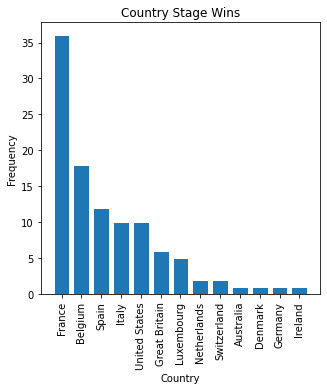

In [8]:
plt.rcParams["figure.figsize"] = (5,5)
plt.bar(stage_wins['Country'],stage_wins['Stage Wins'],ec = 'w')
plt.xticks(rotation = 90)
plt.title('Country Stage Wins')
plt.xlabel("Country")
plt.ylabel('Frequency');

Before explaining this next visual, I’d like to explain how the individual stages of the tour works. Each stage is run on a separate day and has an individual winner for that stage. I wanted to see the trends for these winners and the countries where they come from. After grouping and filtering the data so only the country stage wins were counted, I saw that the country with the most stage wins in the tour was evidently, France. This was an expected result, as in the early years of the Tour de France, the race was yet to be internationally known, and in the early 20th century, transportation was less advanced, leading to less international riders until later on. In addition, Belgium had the second highest number of wins, which can also be attributed to the travel distance, as it is a close neighbor to France.


**Is there a certain team that stands out with the most overall wins in the history of the Tour de France?**

In [10]:
most_wins = tour_df.groupby(['Team'],as_index = False).count()
most_wins = most_wins[['Team','Winner']]
most_wins = most_wins.rename(columns = {'Winner':'Frequency'})
most_wins = most_wins.sort_values('Frequency')
most_wins

,Team,Frequency
0,AD Renting-W-Cup-Bottecchia,1
22,Luxembourg,1
25,Pelforth-Sauvage-Lejeune,1
27,Peugeot-Esso-Michelin,1
31,Renault-Gitane,1
32,Renault-Gitane-Campagnolo,1
33,Reynolds,1
19,La Francaise,1
34,Saint-Raphael-Gitane-Dunlop,1
36,Saint-Raphael-Helyett-Hutchinson,1


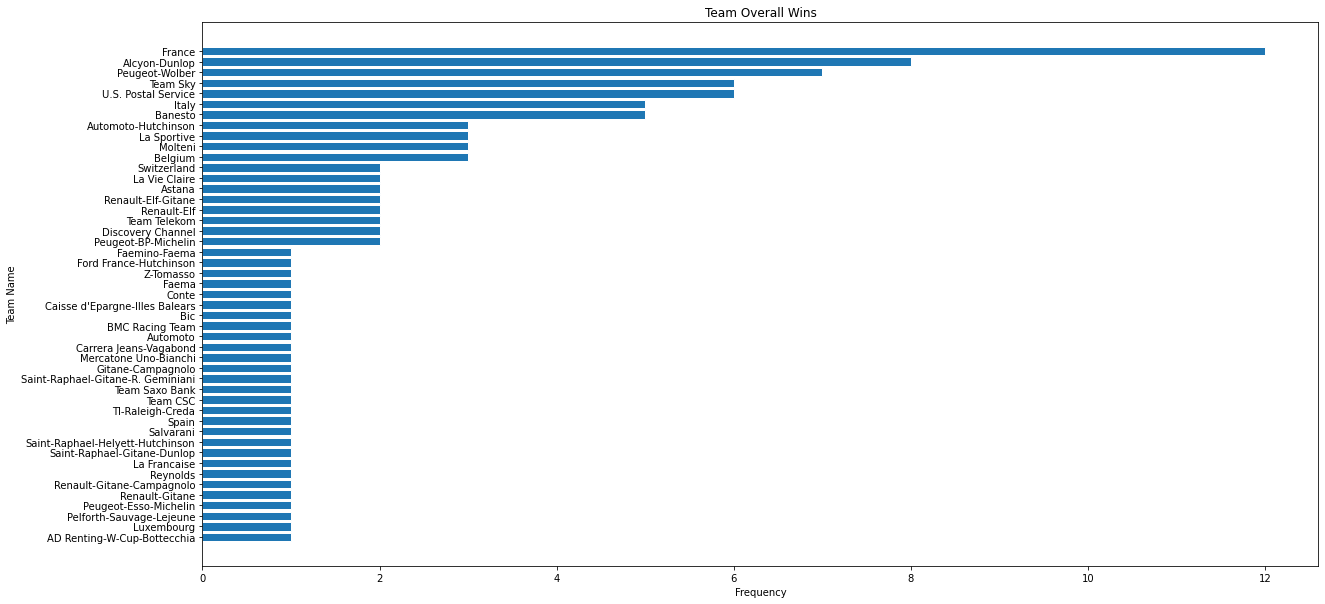

In [12]:
plt.rcParams["figure.figsize"] = (20,10)
plt.barh(most_wins['Team'],most_wins['Frequency'],ec = 'w')
plt.title('Team Overall Wins')
plt.xlabel("Frequency")
plt.ylabel('Team Name');

After seeing the country stage win distribution, I wanted to visualize a more specific data value in team overall wins and to my surprise, France had the most team wins; recently, teams are private and not represented by a country. Another reason for this could be that private teams were introduced to the Tour de France much later on as the race developed, got more popular, and there were more companies willing to sponsor private teams to participate in the race. Let's see how the overall wins compare to the stage wins for each team.

**How do the overall wins compare to the stage wins for different teams?**

In [14]:
grouped_stages = tour_df.groupby(['Team'],as_index = False).sum()
grouped_stages = grouped_stages[['Team','Stages']]
grouped_stages = grouped_stages.sort_values('Stages')
grouped_stages

,Team,Stages
19,La Francaise,6
11,Conte,6
3,Automoto,15
42,Team Saxo Bank,20
8,Bic,20
0,AD Renting-W-Cup-Bottecchia,21
41,Team CSC,21
35,Saint-Raphael-Gitane-R. Geminiani,21
9,Caisse d'Epargne-Illes Balears,21
23,Mercatone Uno-Bianchi,21


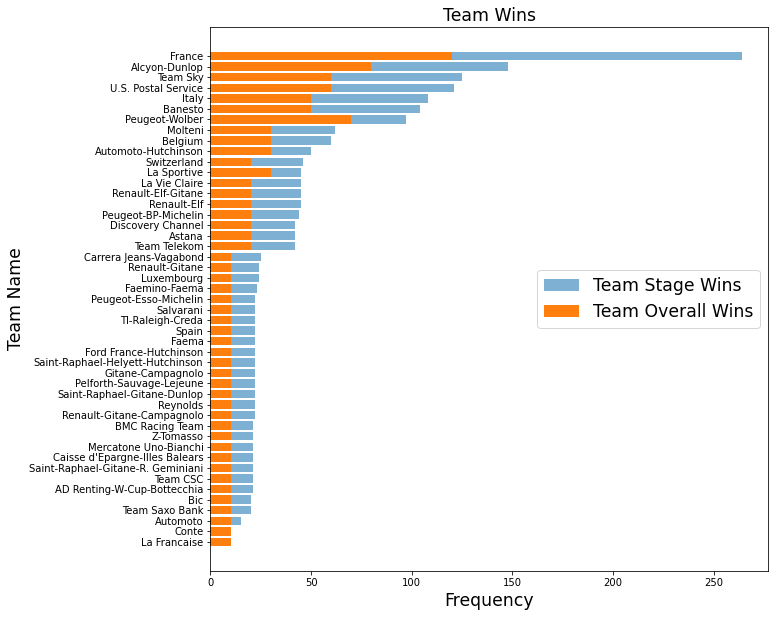

In [26]:
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(grouped_stages['Team'],grouped_stages['Stages'],alpha = .58,label = 'Team Stage Wins')
plt.barh(most_wins['Team'],most_wins['Frequency']*10,label = 'Team Overall Wins')
plt.legend(loc='center right',fontsize = 'xx-large')
plt.title('Team Wins',fontsize = 'xx-large')
plt.xlabel("Frequency",fontsize = 'xx-large')
plt.ylabel('Team Name',fontsize = 'xx-large');

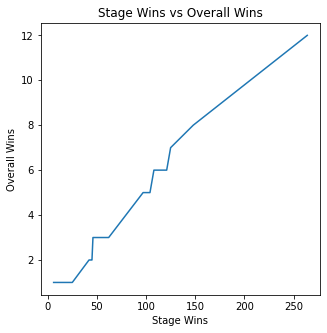

In [98]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(grouped_stages['Stages'],most_wins['Frequency']);
plt.title('Stage Wins vs Overall Wins')
plt.ylabel('Overall Wins')
plt.xlabel("Stage Wins");

After seeing the team overall wins, I wanted to see if there was a correlation between the team stage wins and the team overall wins. The Tour de France is scored by time of completion for each stage, so technically, an overall winner does not need to win any stages throughout the tour, if he has the shortest time completion for the duration of the whole tour. I wanted to visualize how if this rule was evident in the comparison between the overall wins and the stage wins, if there were any teams that had significant different trends than other teams. The only team that stood out in this visual was Peugeot-Wolber, with a larger concentration of overall wins in relation to the stage wins when compared to other teams. It was interesting to see that the distribution of team stage wins and team overall wins were overall very similar and it illustrated that although the rule for winning an overall race is possible without a stage win, it was uncommon. 

**What is the relationship between tour length and the percentage of dropped out riders?**

In [28]:
tour_df['Rider Change Percentage'] = ((tour_df['Starting Riders'] - tour_df['Finishing Riders'])/tour_df['Starting Riders'])*100
tour_df['Distance Std'] = (tour_df['Distance (km)'] - tour_df['Distance (km)'].mean())/tour_df['Distance (km)'].std()
tour_df['Rider Change Percentage Std'] =  (tour_df['Rider Change Percentage'] - tour_df['Rider Change Percentage'].mean())/tour_df['Rider Change Percentage'].std()

In [29]:
X = tour_df[['Rider Change Percentage Std']]
Y = tour_df[['Distance Std']]

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

In [57]:
A = tour_df[['Rider Change Percentage']]
B = tour_df[['Distance (km)']]

linear_regressor = LinearRegression()
linear_regressor.fit(A,B)
B_pred = linear_regressor.predict(A)

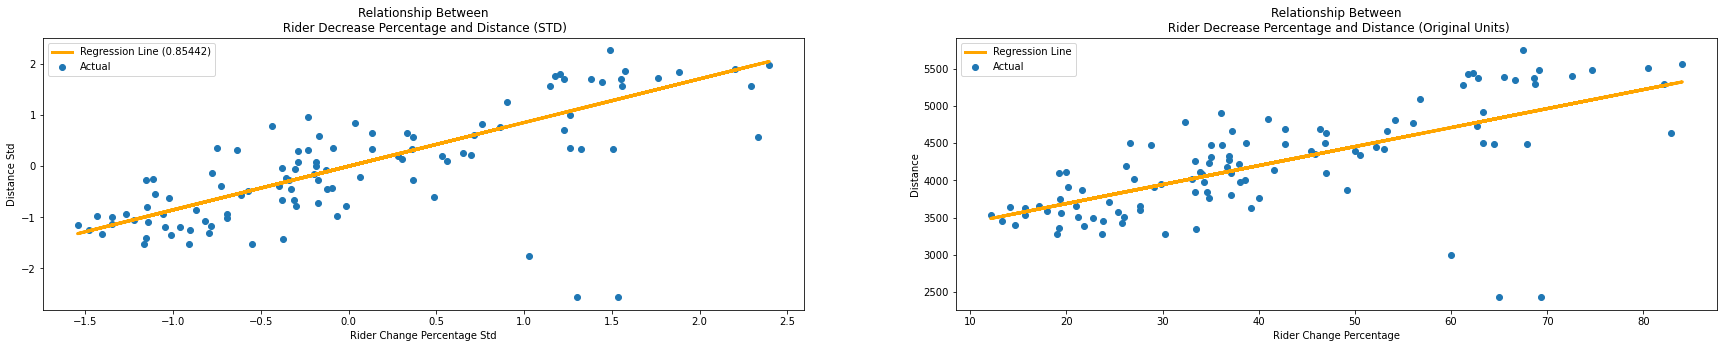

In [59]:
plt.subplot(1,2,1)
plt.scatter(tour_df['Rider Change Percentage Std'],tour_df['Distance Std'],label = 'Actual')
plt.plot(X,Y_pred,color = 'orange',lw = 3,label = 'Regression Line (0.85442)')
plt.legend()
plt.title('Relationship Between\n Rider Decrease Percentage and Distance (STD)')
plt.xlabel('Rider Change Percentage Std')
plt.ylabel('Distance Std');

plt.subplot(1,2,2)
plt.scatter(tour_df['Rider Change Percentage'],tour_df['Distance (km)'],label = 'Actual')
plt.plot(A,B_pred,color = 'orange',lw = 3,label = 'Regression Line')
plt.legend()
plt.title('Relationship Between\n Rider Decrease Percentage and Distance (Original Units)')
plt.xlabel('Rider Change Percentage')
plt.ylabel('Distance');

In [15]:
tour_df.corr()[['Distance Std']].loc[['Rider Change Percentage Std']]

,Distance Std
Rider Change Percentage Std,0.672761


The most interesting question that I had about the evolution of the Tour de France had to do with the change of the length of the race and its association with the percentage of the riders that dropped out of contention each year. As many know, the Tour de France is a very long and gruesome race that, as of today, is held over a course of 21 stages and is over hundreds of kilometers long. Each year there are many riders that drop out of contention, either due to injury or just being unable to finish the long race. In the past 100 years, the race has evolved and has shortened in length, and I was curious to see how the distance of the race changed the percentage of riders that dropped out. 
Firstly, I created three new columns to my original dataframe: 
“Rider Change Percentage”, which is the percentage difference between the starting riders and the finishing riders each year, 
“Distance Std”, which is the distance of the tour in standard units
“Rider Change Percentage Std”, which is the “Rider Change Percentage” column in standard units
With these new variables, I was able to create a scatter plot and find the correlation coefficient between the distance and rider change percentage, which turned out to be 0.672761, indicating a moderate positive linear relationship. I then modeled the regression line which better illustrates how the distance of the tour shortened through the years, the smaller number of riders tend to drop out of the race. In this scatter plot however, there are three points that have a very large negative residual from the regression line. This is probably due to the first three years of the tour having a significant shorter distance than the other years. By removing the three points of the dataset, we could see a different correlation coefficient for the distance and the rider change percentage.

In [37]:
tour_df_modified['Rider Change Percentage'] = ((tour_df_modified['Starting Riders'] - tour_df_modified['Finishing Riders'])/tour_df_modified['Starting Riders'])*100
tour_df_modified['Distance Std'] = (tour_df_modified['Distance (km)'] - tour_df_modified['Distance (km)'].mean())/tour_df_modified['Distance (km)'].std()
tour_df_modified['Rider Change Percentage Std'] =  (tour_df_modified['Rider Change Percentage'] - tour_df_modified['Rider Change Percentage'].mean())/tour_df_modified['Rider Change Percentage'].std()

In [38]:
X = tour_df_modified[['Rider Change Percentage Std']]
Y = tour_df_modified[['Distance Std']]

linear_regressor = LinearRegression()
linear_regressor.fit(X,Y)
Y_pred = linear_regressor.predict(X)

In [54]:
A = tour_df_modified[['Rider Change Percentage']]
B = tour_df_modified[['Distance (km)']]

linear_regressor = LinearRegression()
linear_regressor.fit(A,B)
B_pred = linear_regressor.predict(A)

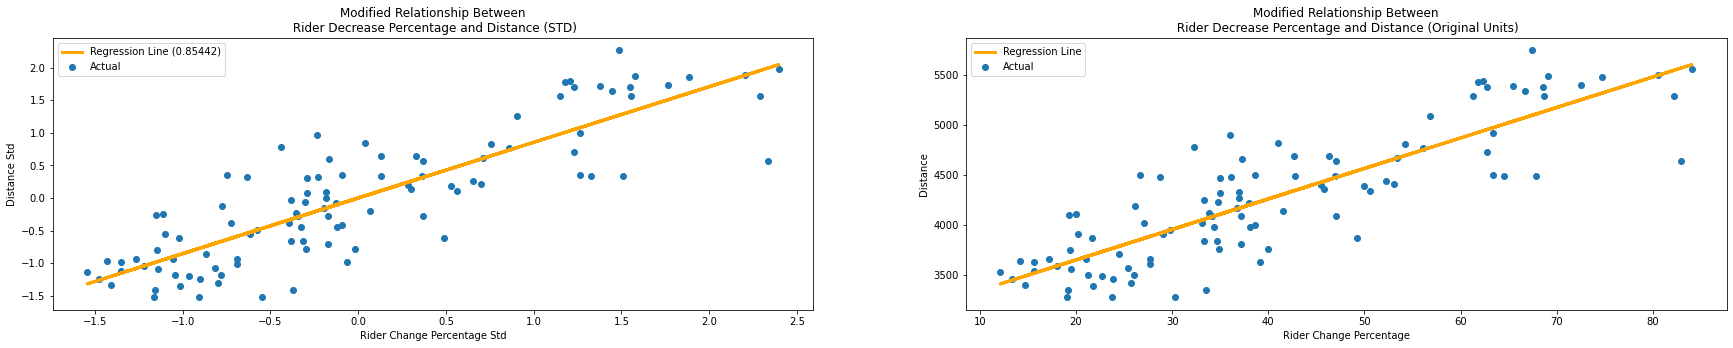

In [56]:
plt.subplot(1,2,1)
plt.scatter(tour_df_modified['Rider Change Percentage Std'],tour_df_modified['Distance Std'],label = 'Actual')
plt.plot(X,Y_pred,color = 'orange',lw = 3,label = 'Regression Line (0.85442)')
plt.legend()
plt.title('Modified Relationship Between\n Rider Decrease Percentage and Distance (STD)')
plt.xlabel('Rider Change Percentage Std')
plt.ylabel('Distance Std');

plt.subplot(1,2,2)
plt.scatter(tour_df_modified['Rider Change Percentage'],tour_df_modified['Distance (km)'],label = 'Actual')
plt.plot(A,B_pred,color = 'orange',lw = 3,label = 'Regression Line')
plt.legend()
plt.title('Modified Relationship Between\n Rider Decrease Percentage and Distance (Original Units)')
plt.xlabel('Rider Change Percentage')
plt.ylabel('Distance');

In [42]:
tour_df_modified.corr()[['Distance Std']].loc[['Rider Change Percentage Std']]

,Distance Std
Rider Change Percentage Std,0.85442


After removing the first three years of the Tour de France, we were able to obtain a greater correlation coefficient value, indicating a stronger linear trend between the distance and the rider change percentage. 

## 4. Conclusion

Through this analysis, I was able to discover some defining characteristics of the Tour de France and see how the race has evolved over the past 100 years. However, through my research, I was intrigued by more possible questions that could be answered with a larger dataset. Specifically, with variables such as weather and elevation change, I would be able to see a correlation between different environmental conditions of the race and how it affected the riders. In addition, as the cycling industry is advancing with new technology, I would like to see the association between different companies or different components in certain bikes and the race. 

Another interesting variable I wished I could discuss with a larger dataset would be the separate jersey rankings that is unique to the Tour de France. As we know, the winner of the Tour is classified by the yellow jersey ranking. However, in the Tour de France, there are also other classifications for other standings: the green jersey for best sprinter, the white jersey for best youngest rider, and the polka dot jersey for best climber. Seeing the trends of these classifications could lead to interesting visualizations for more analysis. 

Finally, I also would've liked to see the power output of different riders and analyze how the trend of the individual riders have evolved over the course of the Tour. Obviously this would be difficult to obtain, as power meters are relatively new technology and the data is not easily attained since teams are hiding valuable information from one another. In summary, I believe that this was a successful analysis and there could be more improvements made to it in the future.